In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [181]:
# Import custom libraries
import warnings
import sys
import os

# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())

In [182]:
import re

In [183]:
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/processed/survey_for_ML.csv'
df = pd.read_csv(url, index_col = 'id_empleado')

In [184]:
nombre_columna_original = 'puesto'
nombre_columna_agrupada = 'puesto_agrupado'
valor_agrupado = 'Otros Puestos'


umbral_conteo = 2 # Umbral de conteo para agrupar categorías


# 1. Obtener el conteo de cada categoría
conteo_categorias = df['puesto'].value_counts()

# 2. Identificar las categorías cuyo conteo es MENOR que el umbral
categorias_a_agrupar = conteo_categorias[conteo_categorias < umbral_conteo].index.tolist()

# 3. Crear la nueva columna agrupada, reemplazando las categorías identificadas
df['puesto_agrupado'] = df['puesto'].replace(categorias_a_agrupar, 'otros_puestos')


In [278]:
df

,rango_edad,genero,estado_civil,estudios,area,antigüedad,trabajo_varias_areas,numero_areas,carrera,numero_empresas,...,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,Otro,Responsabilidades familiares,Salario poco competitivo en el mercado,salario_promedio_anual,puesto_agrupado
id_empleado,,,,,,,,,,,,,,,,,,,,,
InMex001,40-44,Femenino,Casado/a,Licenciatura,Operaciones,70,No,1,Otras,8,...,0,0,1,0,1,0,0,1,216000.0,otros_puestos
InMex002,30-34,Masculino,Soltero/a,Posgrado,Operaciones,109,Si,5,Ciencias Sociales y Administracion,3,...,1,1,1,0,1,0,0,1,288000.0,Gerente
InMex003,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,29,No,1,Ciencias Exactas y Naturales,1,...,1,1,0,1,1,0,0,1,168000.0,Metrologo
InMex004,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,34,Si,2,Ciencias Exactas y Naturales,1,...,0,0,1,0,1,0,0,0,120000.0,Metrologo
InMex005,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,254,Si,3,Ingenieria,0,...,0,0,0,0,0,0,0,0,288000.0,Gerente
InMex006,30-34,Masculino,Soltero/a,Licenciatura,Comercial,34,Si,2,Ingenieria,1,...,0,0,0,0,0,0,0,0,120000.0,Asesor comercial
InMex007,25-29,Masculino,Soltero/a,Licenciatura,Tecnica,8,No,1,Ingenieria,2,...,0,0,0,0,0,0,0,0,168000.0,Metrologo
InMex008,45-49,Femenino,Soltero/a,Licenciatura,Calidad,252,Si,2,Ingenieria,3,...,0,0,0,0,0,0,1,0,288000.0,Gerente
InMex009,40-44,Masculino,Casado/a,Tecnico,Tecnica,119,No,1,Otras,4,...,0,0,0,0,0,0,0,0,216000.0,Metrologo


In [186]:
df.drop(columns = ['id_empleado', 'puesto', 'evaluaciones_desempeno_ult_ano', 'capacitaciones', 'departamento', 'meses_jefe_actual', 'porciento_aumento_salarial'], inplace = True, errors='ignore')

## Trabajar con las variables categóricas

In [187]:
# Se seleccionan las columnas de tipo 'categóricas'
cat = df.select_dtypes(include=['object']).copy()

In [188]:
cat

,rango_edad,genero,estado_civil,estudios,area,trabajo_varias_areas,carrera,valoracion_companeros,salario_mensual,aumento_salario_ult_dos_anos,viajes_mensuales_laborales,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,factores_externos_influencia,factores_externos_opciones,comentarios_experiencia_empresa,puesto_agrupado
id_empleado,,,,,,,,,,,,,,,,,
InMex001,40-44,Femenino,Casado/a,Licenciatura,Operaciones,No,Otras,No,"Entre $16,001 y $20,000",No,No viajo,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,Si,"Oferta laboral en otras empresas, Salario poco...","El ambiente laboral, los constantes cambios de...",otros_puestos
InMex002,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Si,Ciencias Sociales y Administracion,No,"Mas de $24,000",No,Raramente,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,Si,"Oferta laboral en otras empresas, Distancia en...","Conflicto de intereses entre la direccion, fal...",Gerente
InMex003,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,No,Ciencias Exactas y Naturales,No estoy seguro(a),"Entre $12,001 y $16,000",No,Raramente,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,Si,"Oferta laboral en otras empresas, Distancia en...",En general no es malo el trabajo solo que la m...,Metrologo
InMex004,30-34,Masculino,Soltero/a,Licenciatura,Tecnica,Si,Ciencias Exactas y Naturales,Si,"Entre $8,000 y $12,000",Si,Frecuentemente,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",Si,"Oferta laboral en otras empresas, Condiciones ...",El ambiente laboral me agrada bastante y creo ...,Metrologo
InMex005,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Si,Ingenieria,No estoy seguro(a),"Mas de $24,000",No,Frecuentemente,NaN,Mejoras en los salarios,No,NaN,NaN,Gerente
InMex006,30-34,Masculino,Soltero/a,Licenciatura,Comercial,Si,Ingenieria,Si,"Entre $8,000 y $12,000",Si,Frecuentemente,NaN,"Mejores salarios, definicion de funciones y re...",No,NaN,NaN,Asesor comercial
InMex007,25-29,Masculino,Soltero/a,Licenciatura,Tecnica,No,Ingenieria,Si,"Entre $12,001 y $16,000",Si,No viajo,NaN,Contratacion de personal competente,No,NaN,NaN,Metrologo
InMex008,45-49,Femenino,Soltero/a,Licenciatura,Calidad,Si,Ingenieria,Si,"Mas de $24,000",No,Raramente,NaN,Mejor observacion en el proceso de contratacio...,Si,"Responsabilidades familiares, Condiciones econ...",En general estoy agusto con las actividades qu...,Gerente
InMex009,40-44,Masculino,Casado/a,Tecnico,Tecnica,No,Otras,Si,"Entre $16,001 y $20,000",No,Frecuentemente,NaN,Mas prestaciones,No,NaN,Ninguna,Metrologo


In [189]:
# Se asignan las columnas del tipo 'texto' a un df
cat_text = cat[['motivo_abandono_empresa', 'mejoras_para_reduccion_rotacion', 'comentarios_experiencia_empresa']]
cat_text

,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,comentarios_experiencia_empresa
id_empleado,,,
InMex001,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,"El ambiente laboral, los constantes cambios de..."
InMex002,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,"Conflicto de intereses entre la direccion, fal..."
InMex003,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,En general no es malo el trabajo solo que la m...
InMex004,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",El ambiente laboral me agrada bastante y creo ...
InMex005,NaN,Mejoras en los salarios,NaN
InMex006,NaN,"Mejores salarios, definicion de funciones y re...",NaN
InMex007,NaN,Contratacion de personal competente,NaN
InMex008,NaN,Mejor observacion en el proceso de contratacio...,En general estoy agusto con las actividades qu...
InMex009,NaN,Mas prestaciones,Ninguna


In [190]:
text = pd.concat([cat_text, cat['factores_externos_opciones']], axis=1)
text = text.fillna('')
text.to_csv("C:\\Users\\Miguel Oscar\\Projects\\data-INSCO-hub\\data\\processed\\texto.csv", index=False, encoding='utf-8-sig')

In [191]:
# Se eliminan las columnas del tipo 'texto'
cat_to_map = cat.drop(columns=cat_text.columns, errors='ignore')
#cat_to_map.drop(columns=['factores_externos_influencia'], inplace=True, errors='ignore')

In [192]:
# Se elimina la columna 'factores_externos_opciones' y se asigna a un df distinto con el objetivo de hacer un mapeo por separado,
# dado que es una columna de tipo selección múltiple
factores_externos = cat_to_map[['factores_externos_opciones']].copy()
cat_to_map.drop(columns=['factores_externos_opciones'], inplace=True, errors='ignore')

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

In [193]:
from sklearn.preprocessing import OneHotEncoder

#Instanciamos
ohe = OneHotEncoder(sparse_output= False, handle_unknown='ignore', drop='first')

#Entrenamos
ohe.fit(cat_to_map)

#Aplicamos
cat_ohe = ohe.transform(cat_to_map)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat_to_map.columns)).reset_index(drop = True)

In [194]:
cat_ohe.set_index(df.index, inplace = True)

In [195]:
# Separar los posibles valores de la columna 'factores_externos_opciones' en una lista
opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones economicas generales',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales',
    'Otro'
]

factores_externos['factores_externos_opciones'] = factores_externos['factores_externos_opciones'].fillna('')

factores_opciones_dummies = factores_externos['factores_externos_opciones'].str.get_dummies(sep=', ')

for opcion in opciones_posibles:
     if opcion not in factores_opciones_dummies.columns:
        factores_opciones_dummies[opcion] = 0 

In [196]:
if 'index' not in factores_opciones_dummies.columns:
    factores_opciones_dummies.reset_index(inplace=True)
    

In [197]:
# Unir las nuevas columnas binarias al DataFrame original
categoricas = pd.concat([cat_ohe, factores_opciones_dummies], axis=1)

if 'index'not in categoricas.columns:
    categoricas.reset_index(inplace=True)
    categoricas.drop(columns=['id_empleado'], inplace=True)

## Trabajar con las variables numéricas

In [198]:
num = df.select_dtypes('number').reset_index(drop=True)

In [199]:
num.drop(columns=opciones_posibles, inplace=True, errors='ignore')

In [200]:
num[['antigüedad', 'tiempo_puesto', 'meses_ultima_promocion']] = (num[['antigüedad', 'tiempo_puesto', 
                                                                                            'meses_ultima_promocion']]/12).round(2)

In [201]:
num['salario_promedio_anual'] = num['salario_promedio_anual']*1.3

In [202]:
num['horas_extras_semanales'] = num['horas_extras_semanales']*4

In [203]:
num.rename(columns={'antigüedad': 'antiguedad', 'satisfaccion_puesto_actual':'satisfaccion_puesto', 
                    'implicacion_puesto': 'implicacion', 'horas_extras_semanales': 'horas_extras_mes', 
                    'meses_ultima_promocion': 'promocion_años',
                    'salario_promedio_anual': 'salario_anual'}, inplace=True)

### Dataframe final

In [204]:
if 'index' not in cat_ohe.columns:    
    cat_ohe.reset_index(inplace = True)
    cat_ohe.drop(columns=['id_empleado'], inplace = True, errors='ignore')
    

In [205]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,rango_edad_ 30-34,rango_edad_ 40-44,rango_edad_ 45-49,rango_edad_50 o mas,rango_edad_< 25,genero_Masculino,estado_civil_Divorciado/a,estado_civil_Soltero/a,estado_civil_Union libre,estudios_Posgrado,...,satisfaccion_puesto,implicacion,satisfaccion_laboral_personal,horas_trabajo_mensual,horas_extras_mes,tiempo_traslado_diario,tiempo_puesto,promocion_años,abandono,salario_anual
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,45.0,0.0,3.00,5.83,5.83,1,280800.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,2,1,50.0,40.0,5.00,4.00,4.00,1,374400.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,4,3,50.0,4.0,3.00,2.42,2.42,1,218400.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,4,4,40.0,10.0,3.00,0.75,0.75,1,156000.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,5,4,48.0,16.0,2.00,6.00,6.00,0,374400.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,4,41.0,0.0,1.50,2.33,2.33,0,156000.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,4,4,48.0,0.0,3.00,0.67,0.67,0,218400.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5,5,4,48.0,12.0,3.25,7.00,7.00,0,374400.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5,5,4,47.0,0.0,2.00,9.92,9.92,0,280800.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,4,48.0,4.0,5.00,0.67,0.25,1,218400.0


In [206]:
salario_anual = num['salario_anual']
df_ml.drop(columns=['salario_anual'], inplace=True, errors='ignore')
df_ml

,rango_edad_ 30-34,rango_edad_ 40-44,rango_edad_ 45-49,rango_edad_50 o mas,rango_edad_< 25,genero_Masculino,estado_civil_Divorciado/a,estado_civil_Soltero/a,estado_civil_Union libre,estudios_Posgrado,...,satisfaccion_entorno,satisfaccion_puesto,implicacion,satisfaccion_laboral_personal,horas_trabajo_mensual,horas_extras_mes,tiempo_traslado_diario,tiempo_puesto,promocion_años,abandono
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,3,3,45.0,0.0,3.00,5.83,5.83,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,2,2,1,50.0,40.0,5.00,4.00,4.00,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,4,4,3,50.0,4.0,3.00,2.42,2.42,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,4,4,40.0,10.0,3.00,0.75,0.75,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,5,5,4,48.0,16.0,2.00,6.00,6.00,0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,5,4,41.0,0.0,1.50,2.33,2.33,0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,5,4,4,48.0,0.0,3.00,0.67,0.67,0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4,5,5,4,48.0,12.0,3.25,7.00,7.00,0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5,5,5,4,47.0,0.0,2.00,9.92,9.92,0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,5,4,48.0,4.0,5.00,0.67,0.25,1


## Diseño del modelo

In [207]:
# Importar las librerías
import statsmodels.api as sm  # Para realizar analálisis estadísticos
from sklearn.model_selection import cross_val_score, KFold # cross_val_score para CV simple, KFold si haces CV manual
from sklearn.preprocessing import StandardScaler # Para estandarizar
from sklearn.linear_model import LogisticRegression # Un modelo de ejemplo (scikit-learn)
from sklearn.pipeline import Pipeline # Para encadenar pasos de preprocesamiento y modelo
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones a columnas específicas

# Opcional: Para métricas más allá del score por defecto
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [208]:
# df_ml[col_to_scaler] = df_ml[col_to_scaler].apply(lambda x: (x - x.mean()) / x.std())


In [209]:
x_raw = df_ml.drop('abandono', axis = 1)
y = df_ml['abandono']

In [210]:
# Creamos la tabla de correlación entre ``abandono`` y el resto de variables
correlaciones = df_ml.corr()['abandono'].drop('abandono').sort_values(ascending=False)

In [211]:
correlaciones

factores_externos_influencia_Si               0.519667
aumento_salario_ult_dos_anos_Si               0.380601
carrera_Ciencias Sociales y Administracion    0.313128
rango_edad_ 30-34                             0.245525
horas_trabajo_mensual                         0.241990
area_Servicio al Cliente                      0.220998
puesto_agrupado_Servicio al cliente           0.220998
area_Operaciones                              0.183449
viajes_mensuales_laborales_No viajo           0.180542
trabajo_varias_areas_Si                       0.175064
numero_areas                                  0.154494
estado_civil_Union libre                      0.086831
tiempo_traslado_diario                        0.080581
estado_civil_Soltero/a                        0.069838
puesto_agrupado_Jefe de laboratorio           0.065465
salario_mensual_Entre $16,001 y $20,000       0.053769
salario_mensual_Entre $8,000 y $12,000        0.032121
estudios_Posgrado                            -0.005525
rango_edad

#### Seleccionamos las variables más influyentes

In [248]:
variables_significativas = correlaciones[abs(correlaciones) > 0.2].index.tolist()
variables_significativas

['factores_externos_influencia_Si',
 'aumento_salario_ult_dos_anos_Si',
 'carrera_Ciencias Sociales y Administracion',
 'rango_edad_ 30-34',
 'horas_trabajo_mensual',
 'area_Servicio al Cliente',
 'puesto_agrupado_Servicio al cliente',
 'salario_mensual_Entre $20,001 y $24,000',
 'rango_edad_50 o mas',
 'estudios_Preparatoria',
 'tiempo_puesto',
 'rango_edad_ 45-49',
 'implicacion',
 'satisfaccion_entorno',
 'promocion_años',
 'antiguedad',
 'satisfaccion_laboral_personal',
 'satisfaccion_puesto']

### Seleccionamos las variables para desarrollar el modelo

In [249]:
# Utilizamos primero 'factores_externos_influencia_Si' como variable explicativa
y = df_ml['abandono']
x1 = df_ml['factores_externos_influencia_Si']


### Como la variable target es binaria conviene utilizar ``Regresión Logística`` en lugar de ``Regresión Lineal``

### Regresión

In [250]:
x = sm.add_constant(x1)

reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.549880
         Iterations 5


In [251]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               abandono   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:              dom., 27 abr. 2025   Pseudo R-squ.:                  0.2064
Time:                        17:36:08   Log-Likelihood:                -22.545
converged:                       True   LL-Null:                       -28.407
Covariance Type:            nonrobust   LLR p-value:                 0.0006171
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.4663      0.641     -2.289      0.022      -2.722      -0.211
factores_externos_influencia_Si     2.4108      0.780      3.090      0.002       0.882       3.940
===================================================================================================
"""

### Lo intentamos con el resto de variables

In [252]:
# Selección de la variable target
y = df_ml['abandono']
variables_significativas.pop(0)
x1 = df_ml[variables_significativas]

In [253]:
x = sm.add_constant(x1)

reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

c:\Users\Miguel Oscar\Projects\data-INSCO-hub\Insco_DS\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Miguel Oscar\Projects\data-INSCO-hub\Insco_DS\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [254]:
x1 = df_ml[['implicacion', 'horas_extras_mes', 'valoracion_companeros_Si', 'aumento_salario_ult_dos_anos_Si']]
y= df_ml['abandono']
x = sm.add_constant(x1)

reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.485613
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               abandono   No. Observations:                   41
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            4
Date:              dom., 27 abr. 2025   Pseudo R-squ.:                  0.2991
Time:                        17:36:14   Log-Likelihood:                -19.910
converged:                       True   LL-Null:                       -28.407
Covariance Type:            nonrobust   LLR p-value:                  0.001939
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.7922      2.179      2.199      0.028       0.521       9.064
implicacion                        -1.2806      0.592     -2.162      0.031      -2.442      -0.119
horas_extras_mes                   -0.0443      0.048     -0.925      0.355      -0.138       0.050
valoracion_companeros_Si           -1.3375      1.007     -1.328      0.184      -3.311       0.636
aumento_salario_ult_dos_anos_Si     3.3545      1.188      2.823      0.005       1.026       5.683
===================================================================================================
"""

### Entrenamiento del modelo

In [219]:
df_ml

,rango_edad_ 30-34,rango_edad_ 40-44,rango_edad_ 45-49,rango_edad_50 o mas,rango_edad_< 25,genero_Masculino,estado_civil_Divorciado/a,estado_civil_Soltero/a,estado_civil_Union libre,estudios_Posgrado,...,satisfaccion_entorno,satisfaccion_puesto,implicacion,satisfaccion_laboral_personal,horas_trabajo_mensual,horas_extras_mes,tiempo_traslado_diario,tiempo_puesto,promocion_años,abandono
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,3,3,45.0,0.0,3.00,5.83,5.83,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2,2,2,1,50.0,40.0,5.00,4.00,4.00,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,4,4,3,50.0,4.0,3.00,2.42,2.42,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,3,4,4,40.0,10.0,3.00,0.75,0.75,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,5,5,4,48.0,16.0,2.00,6.00,6.00,0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,5,4,41.0,0.0,1.50,2.33,2.33,0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4,5,4,4,48.0,0.0,3.00,0.67,0.67,0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4,5,5,4,48.0,12.0,3.25,7.00,7.00,0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5,5,5,4,47.0,0.0,2.00,9.92,9.92,0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,5,5,5,4,48.0,4.0,5.00,0.67,0.25,1


In [255]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

In [256]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=42) 

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [257]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [258]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.        , 0.94117647, 0.        , 1.        , 0.        ,
       0.94117647, 0.94117647, 0.        , 0.94117647, 0.        ,
       0.94117647, 0.94117647, 0.94117647])

In [259]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

np.float64(0.7)

### INTERPRETACIÓN

#### Diagrama del árbol

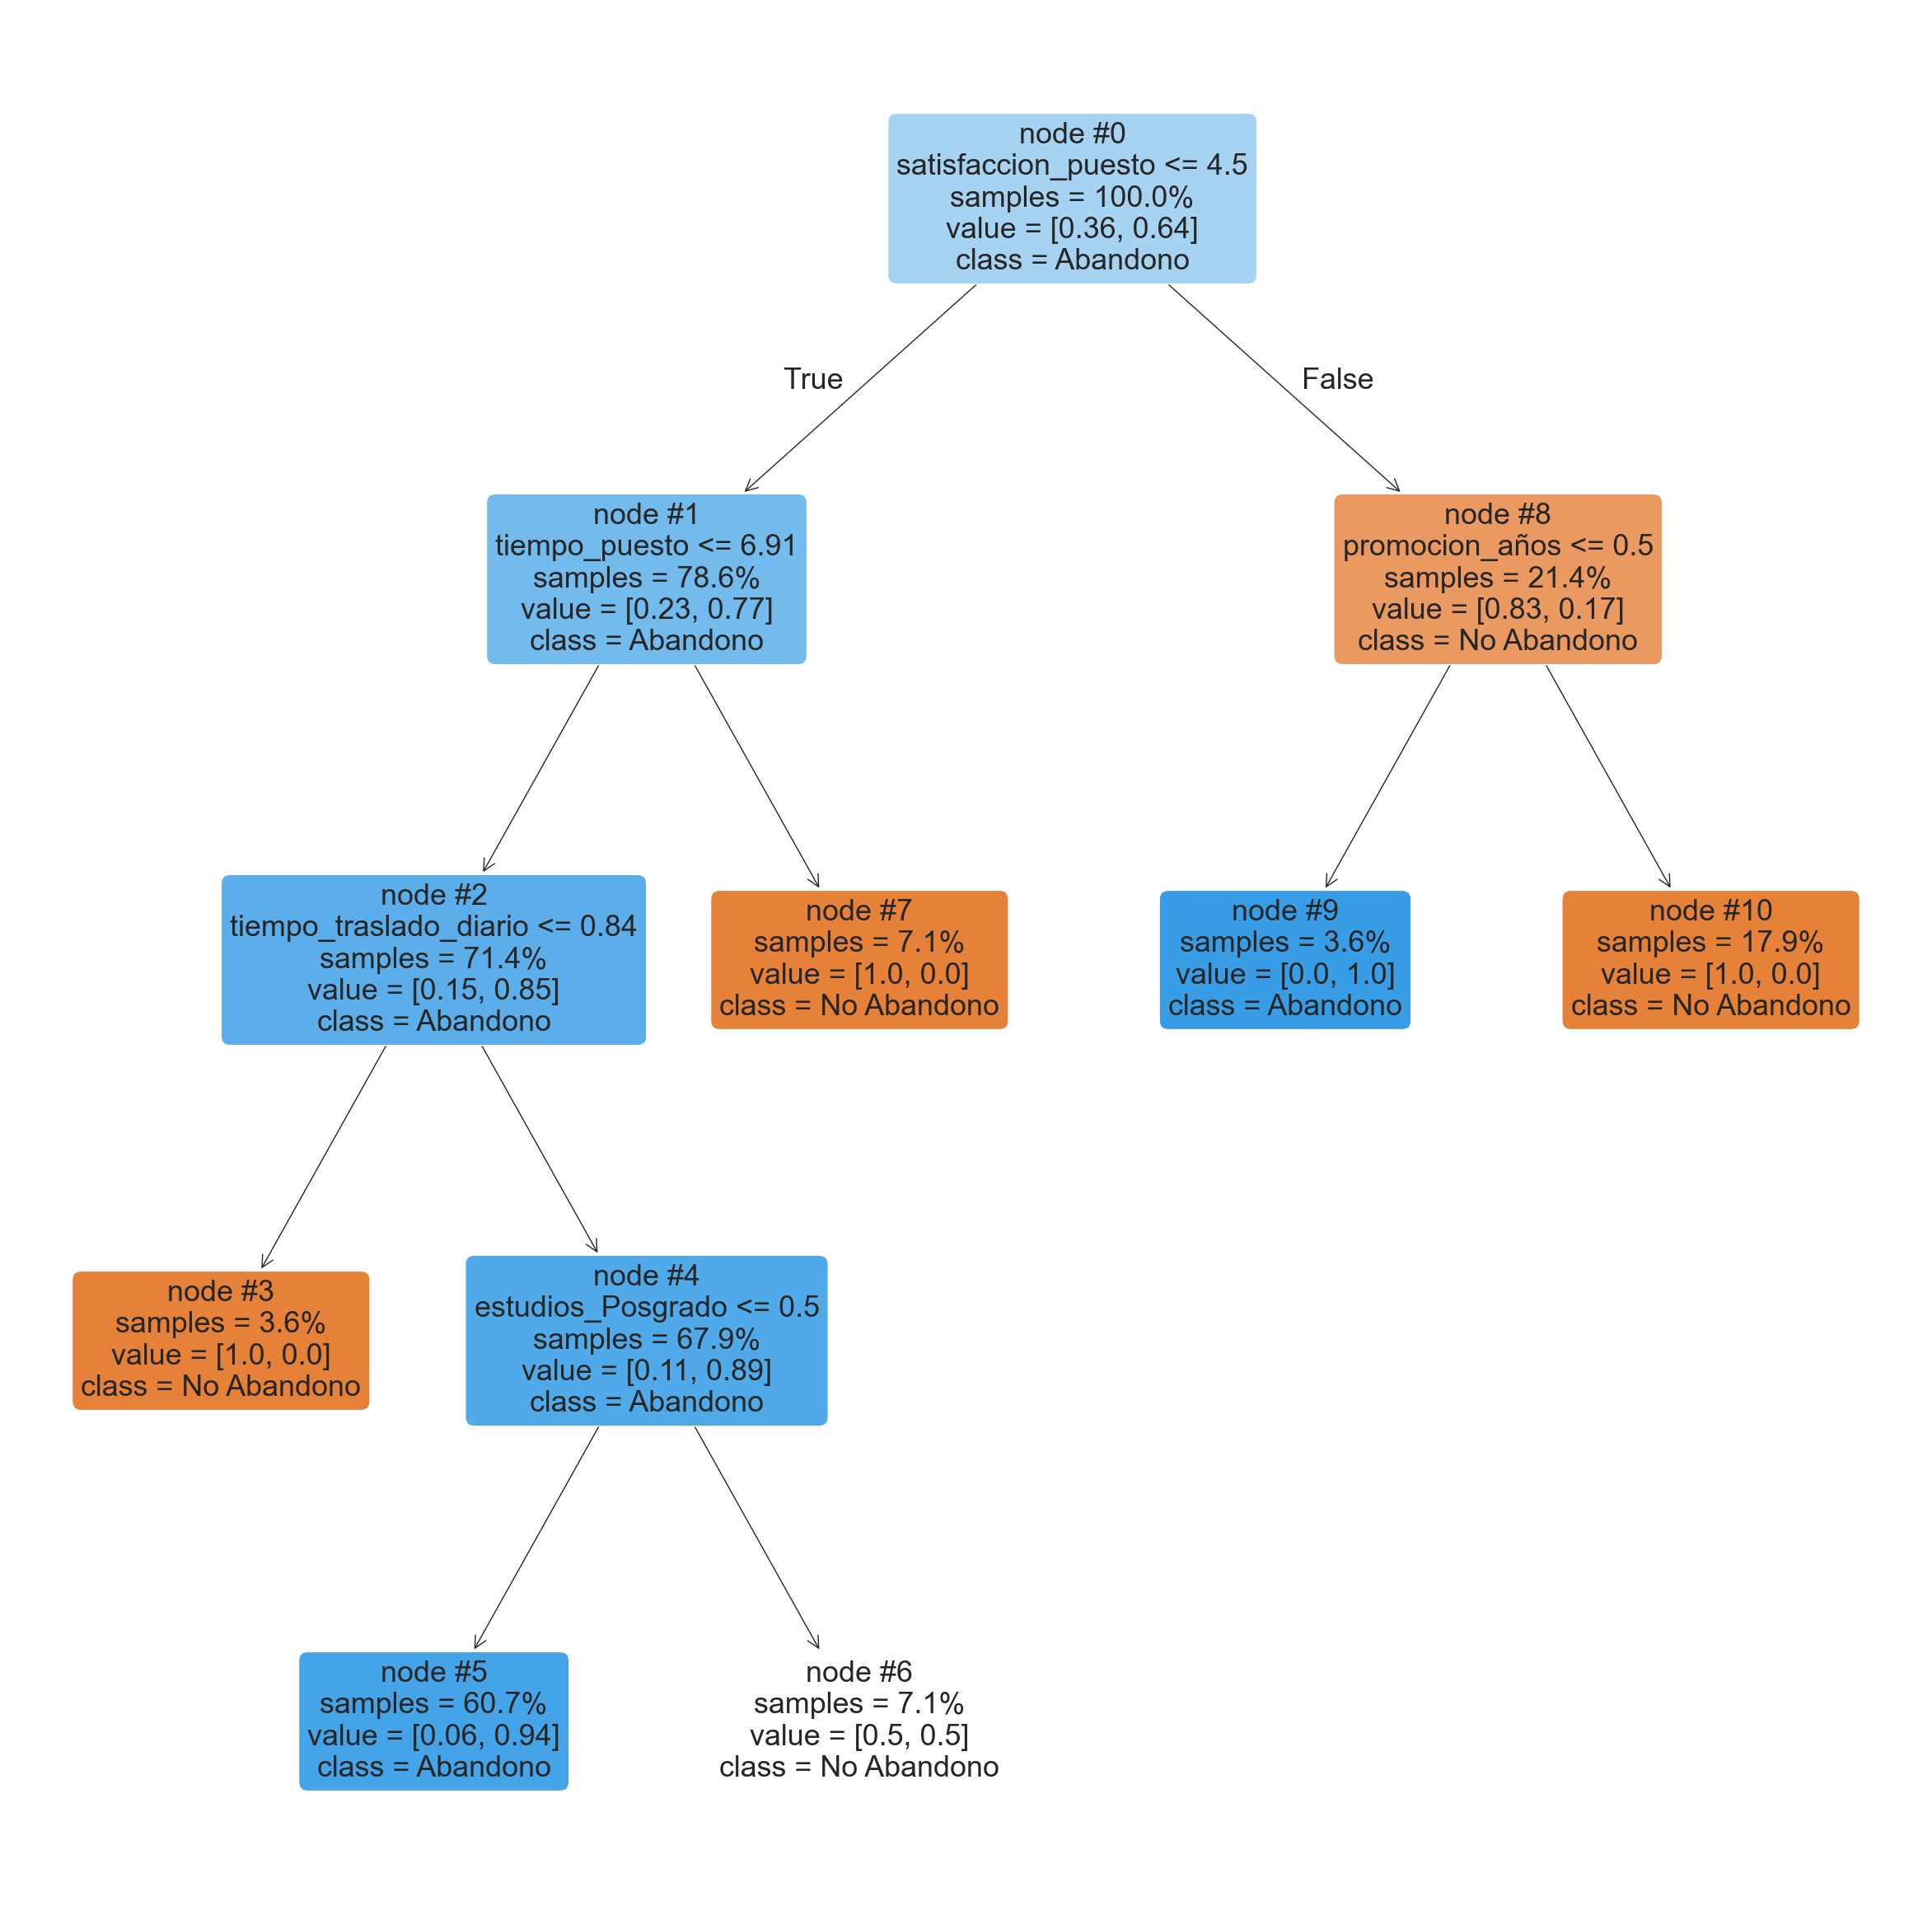

In [260]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (30,30))

# Define los nombres de tus clases si tu target es 0 y 1
# Asegúrate de que el orden corresponda al orden en que scikit-learn ve las clases
# (generalmente orden numérico o alfabético)
nombres_clases = ['No Abandono', 'Abandono'] # Ejemplo, ajusta si tus clases son diferentes

plot_tree(ac,
          feature_names= test_x.columns,
          class_names=nombres_clases, # <-- Añade esto para mostrar el nombre de la clase mayoritaria
          filled=True,         # <-- Añade esto para colorear los nodos por clase y pureza
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

plt.show() # Es fundamental para mostrar el gráfico

In [268]:
df_ml.columns

Index(['rango_edad_ 30-34', 'rango_edad_ 40-44', 'rango_edad_ 45-49',
       'rango_edad_50 o mas', 'rango_edad_< 25', 'genero_Masculino',
       'estado_civil_Divorciado/a', 'estado_civil_Soltero/a',
       'estado_civil_Union libre', 'estudios_Posgrado',
       'estudios_Preparatoria', 'estudios_Tecnico', 'area_Comercial ',
       'area_Operaciones', 'area_Servicio al Cliente', 'area_Tecnica',
       'trabajo_varias_areas_Si', 'carrera_Ciencias Sociales y Administracion',
       'carrera_Humanidades y Artes', 'carrera_Ingenieria', 'carrera_Otras',
       'carrera_Tecnologias o Tecnicas',
       'valoracion_companeros_No estoy seguro(a)', 'valoracion_companeros_Si',
       'salario_mensual_Entre $16,001 y $20,000',
       'salario_mensual_Entre $20,001 y $24,000',
       'salario_mensual_Entre $8,000 y $12,000',
       'salario_mensual_Mas de $24,000', 'salario_mensual_Menos de $8,000',
       'aumento_salario_ult_dos_anos_Si',
       'viajes_mensuales_laborales_No viajo',
       'via

In [277]:
# Aplicando validacion cruzada

# x = df_ml.drop(columns=['estudios_Posgrado', 'estudios_Preparatoria', 'estudios_Tecnico', 'abandono'])
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

ac = DecisionTreeClassifier(max_depth=4)

# --- Paso 3: Realizar Validación Cruzada ---

# Opción A: Usando cross_val_score (para una sola métrica)
# scoring='roc_auc' es común para problemas de clasificación desbalanceada.
# Puedes usar 'accuracy', 'f1', 'precision', 'recall', etc.
# cv=5 o cv=10 son valores comunes para el número de folds.

n_folds = 5
scoring_metric = 'roc_auc'

print(f"\nRealizando Validación Cruzada ({n_folds} folds) con métrica '{scoring_metric}'...")

# cross_val_score recibe: el estimador (tu modelo 'ac'), las features 'x', el target 'y',
# el número de folds 'cv', y la métrica 'scoring'.
cv_scores = cross_val_score(ac, x_train, y_train, cv=n_folds, scoring=scoring_metric)

print(f"Scores de '{scoring_metric}' en cada fold: {cv_scores}")
print(f"Promedio de '{scoring_metric}' en CV: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar de '{scoring_metric}' en CV: {np.std(cv_scores):.4f}")



Realizando Validación Cruzada (5 folds) con métrica 'roc_auc'...
Scores de 'roc_auc' en cada fold: [0.625      0.375      0.5        0.33333333 0.33333333]
Promedio de 'roc_auc' en CV: 0.4333
Desviación estándar de 'roc_auc' en CV: 0.1137


In [275]:
ac.fit(train_x,train_y)

pred = ac.predict_proba(test_x)[:, 1]

roc_auc_score(test_y,pred)

np.float64(0.8)

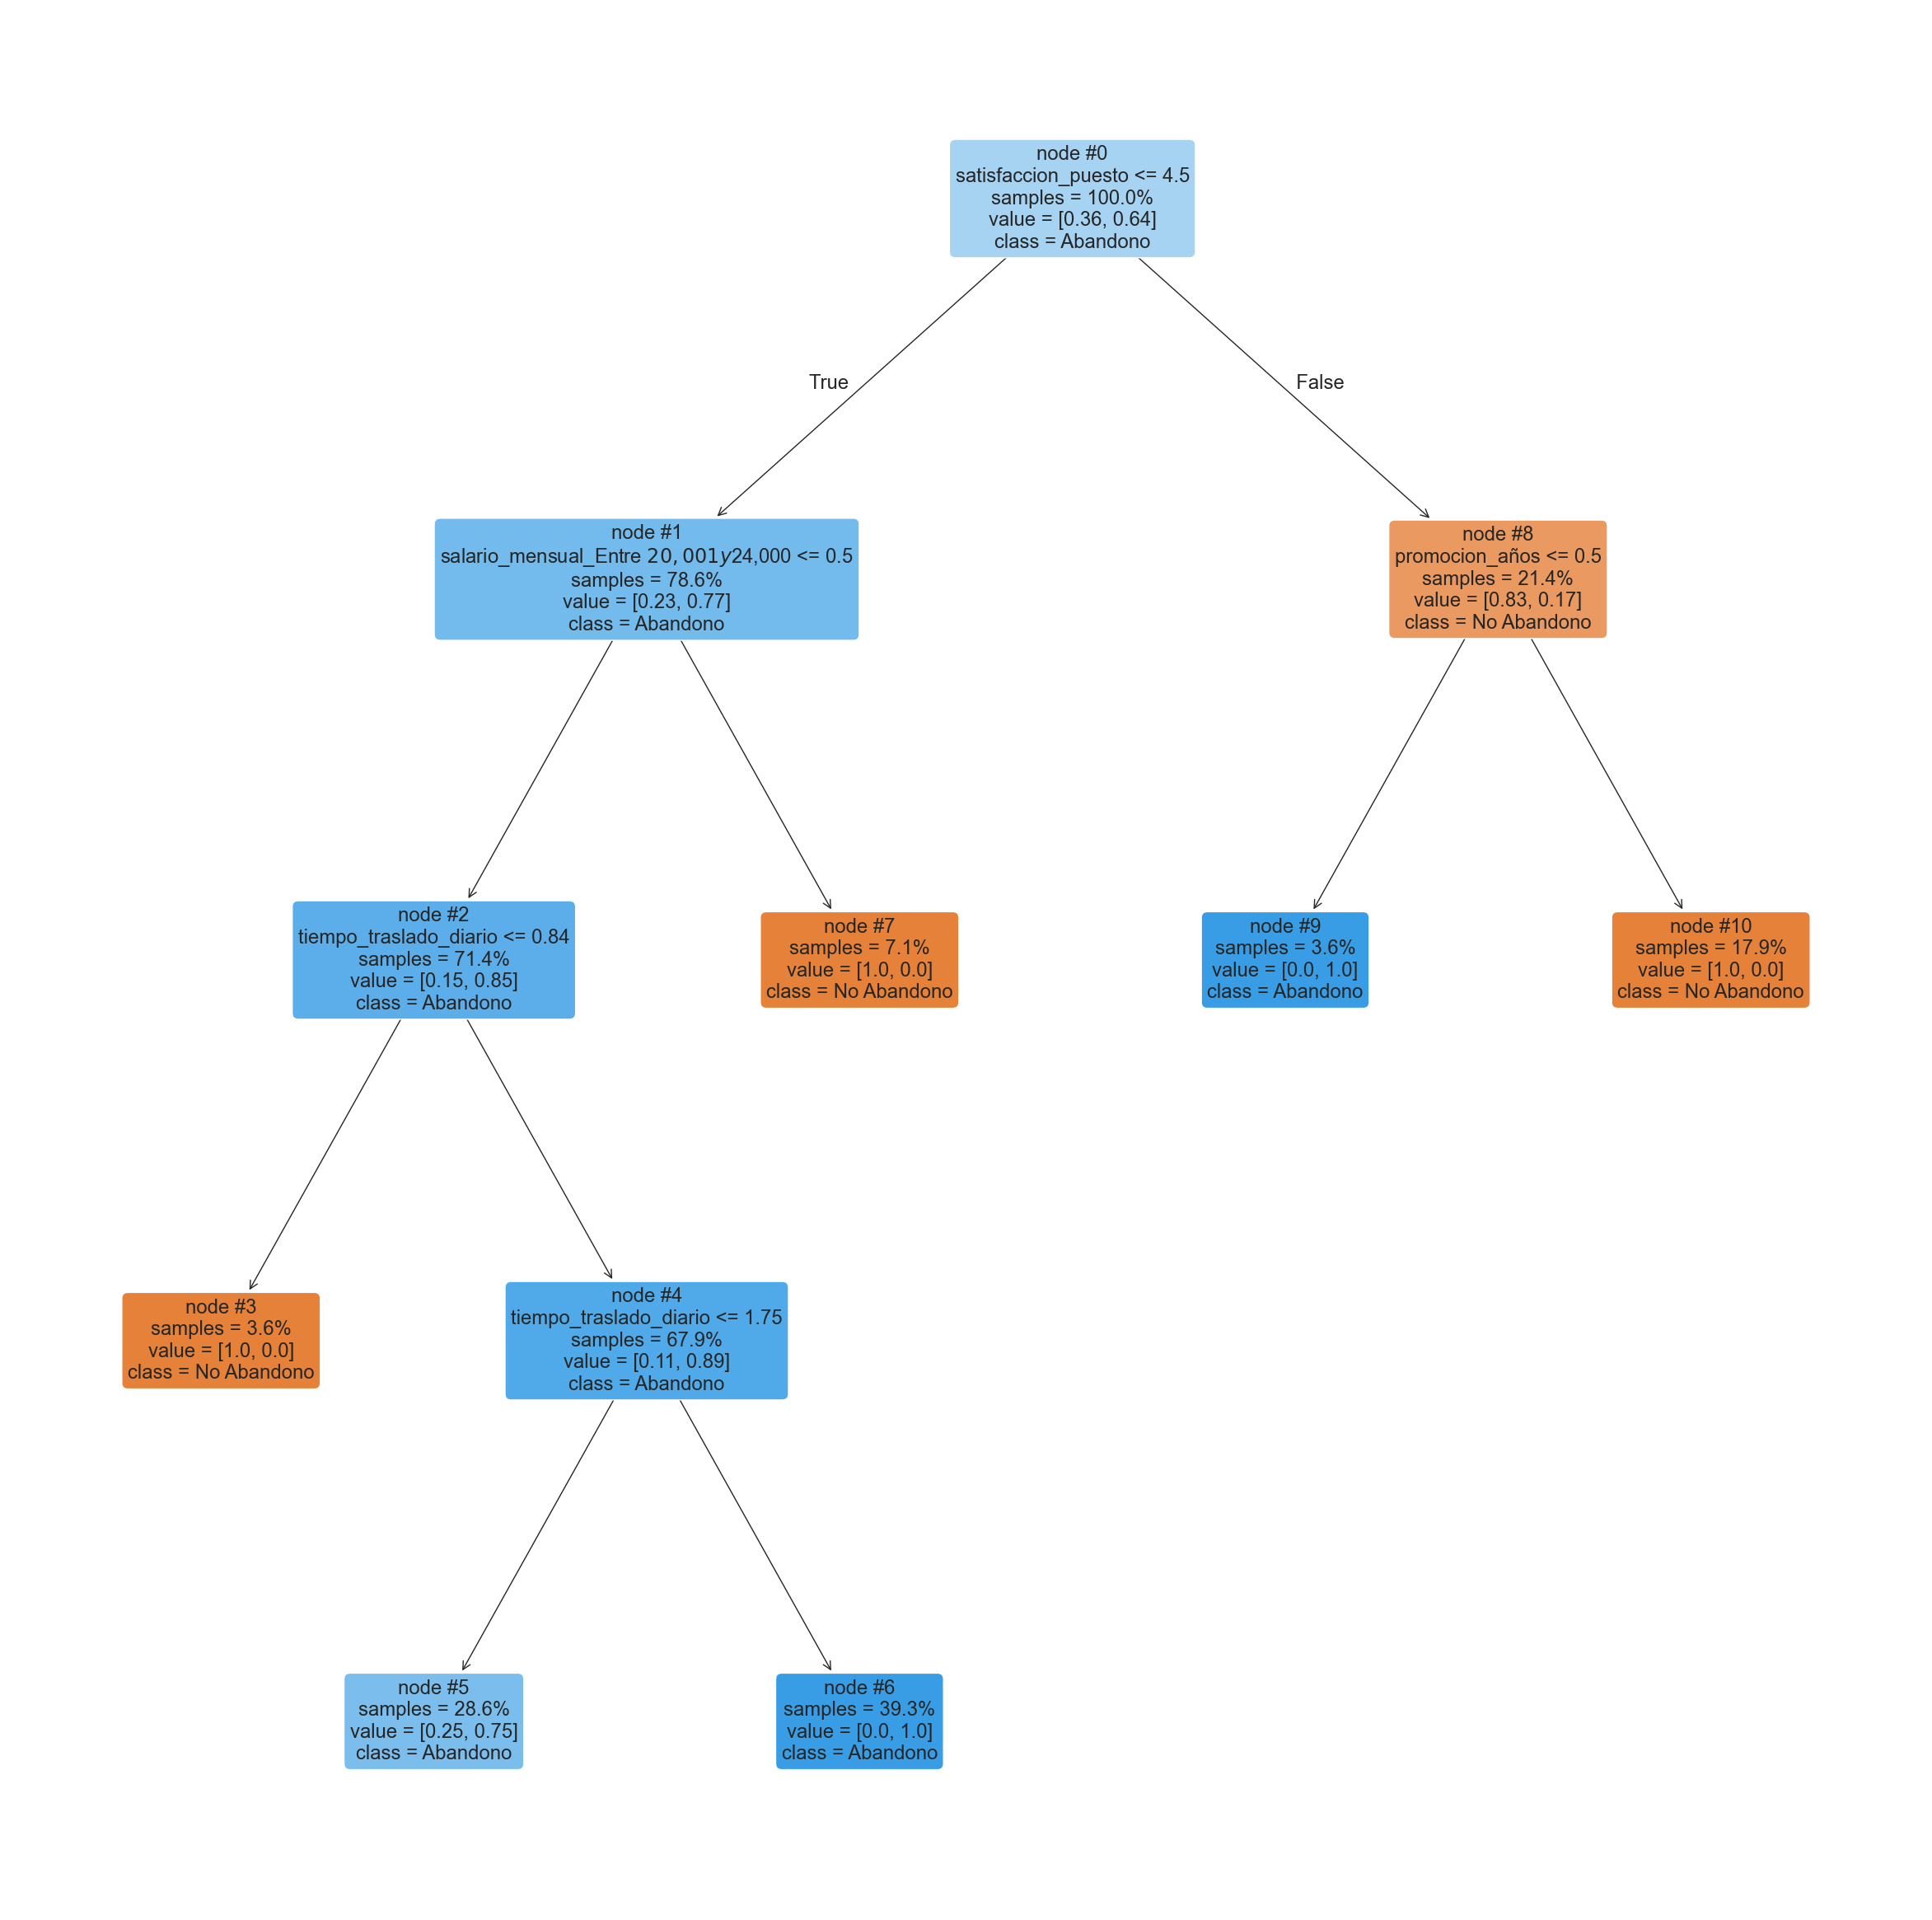

In [276]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (30,30))

# Define los nombres de tus clases si tu target es 0 y 1
# Asegúrate de que el orden corresponda al orden en que scikit-learn ve las clases
# (generalmente orden numérico o alfabético)
nombres_clases = ['No Abandono', 'Abandono'] # Ejemplo, ajusta si tus clases son diferentes

plot_tree(ac,
          feature_names= test_x.columns,
          class_names=nombres_clases, # <-- Añade esto para mostrar el nombre de la clase mayoritaria
          filled=True,         # <-- Añade esto para colorear los nodos por clase y pureza
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

plt.show() # Es fundamental para mostrar el gráfico

### Tomemos ahora solo las variables significativas nombradas anteriormente

In [263]:
x = df_ml[variables_significativas]
y = df_ml['abandono']

In [229]:
# Dividir el conjunto de datos en entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [230]:
#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [231]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.83333333, 0.        , 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.        , 0.83333333, 0.83333333, 0.        ,
       0.        , 0.83333333, 0.        ])

In [232]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

np.float64(0.7023809523809524)

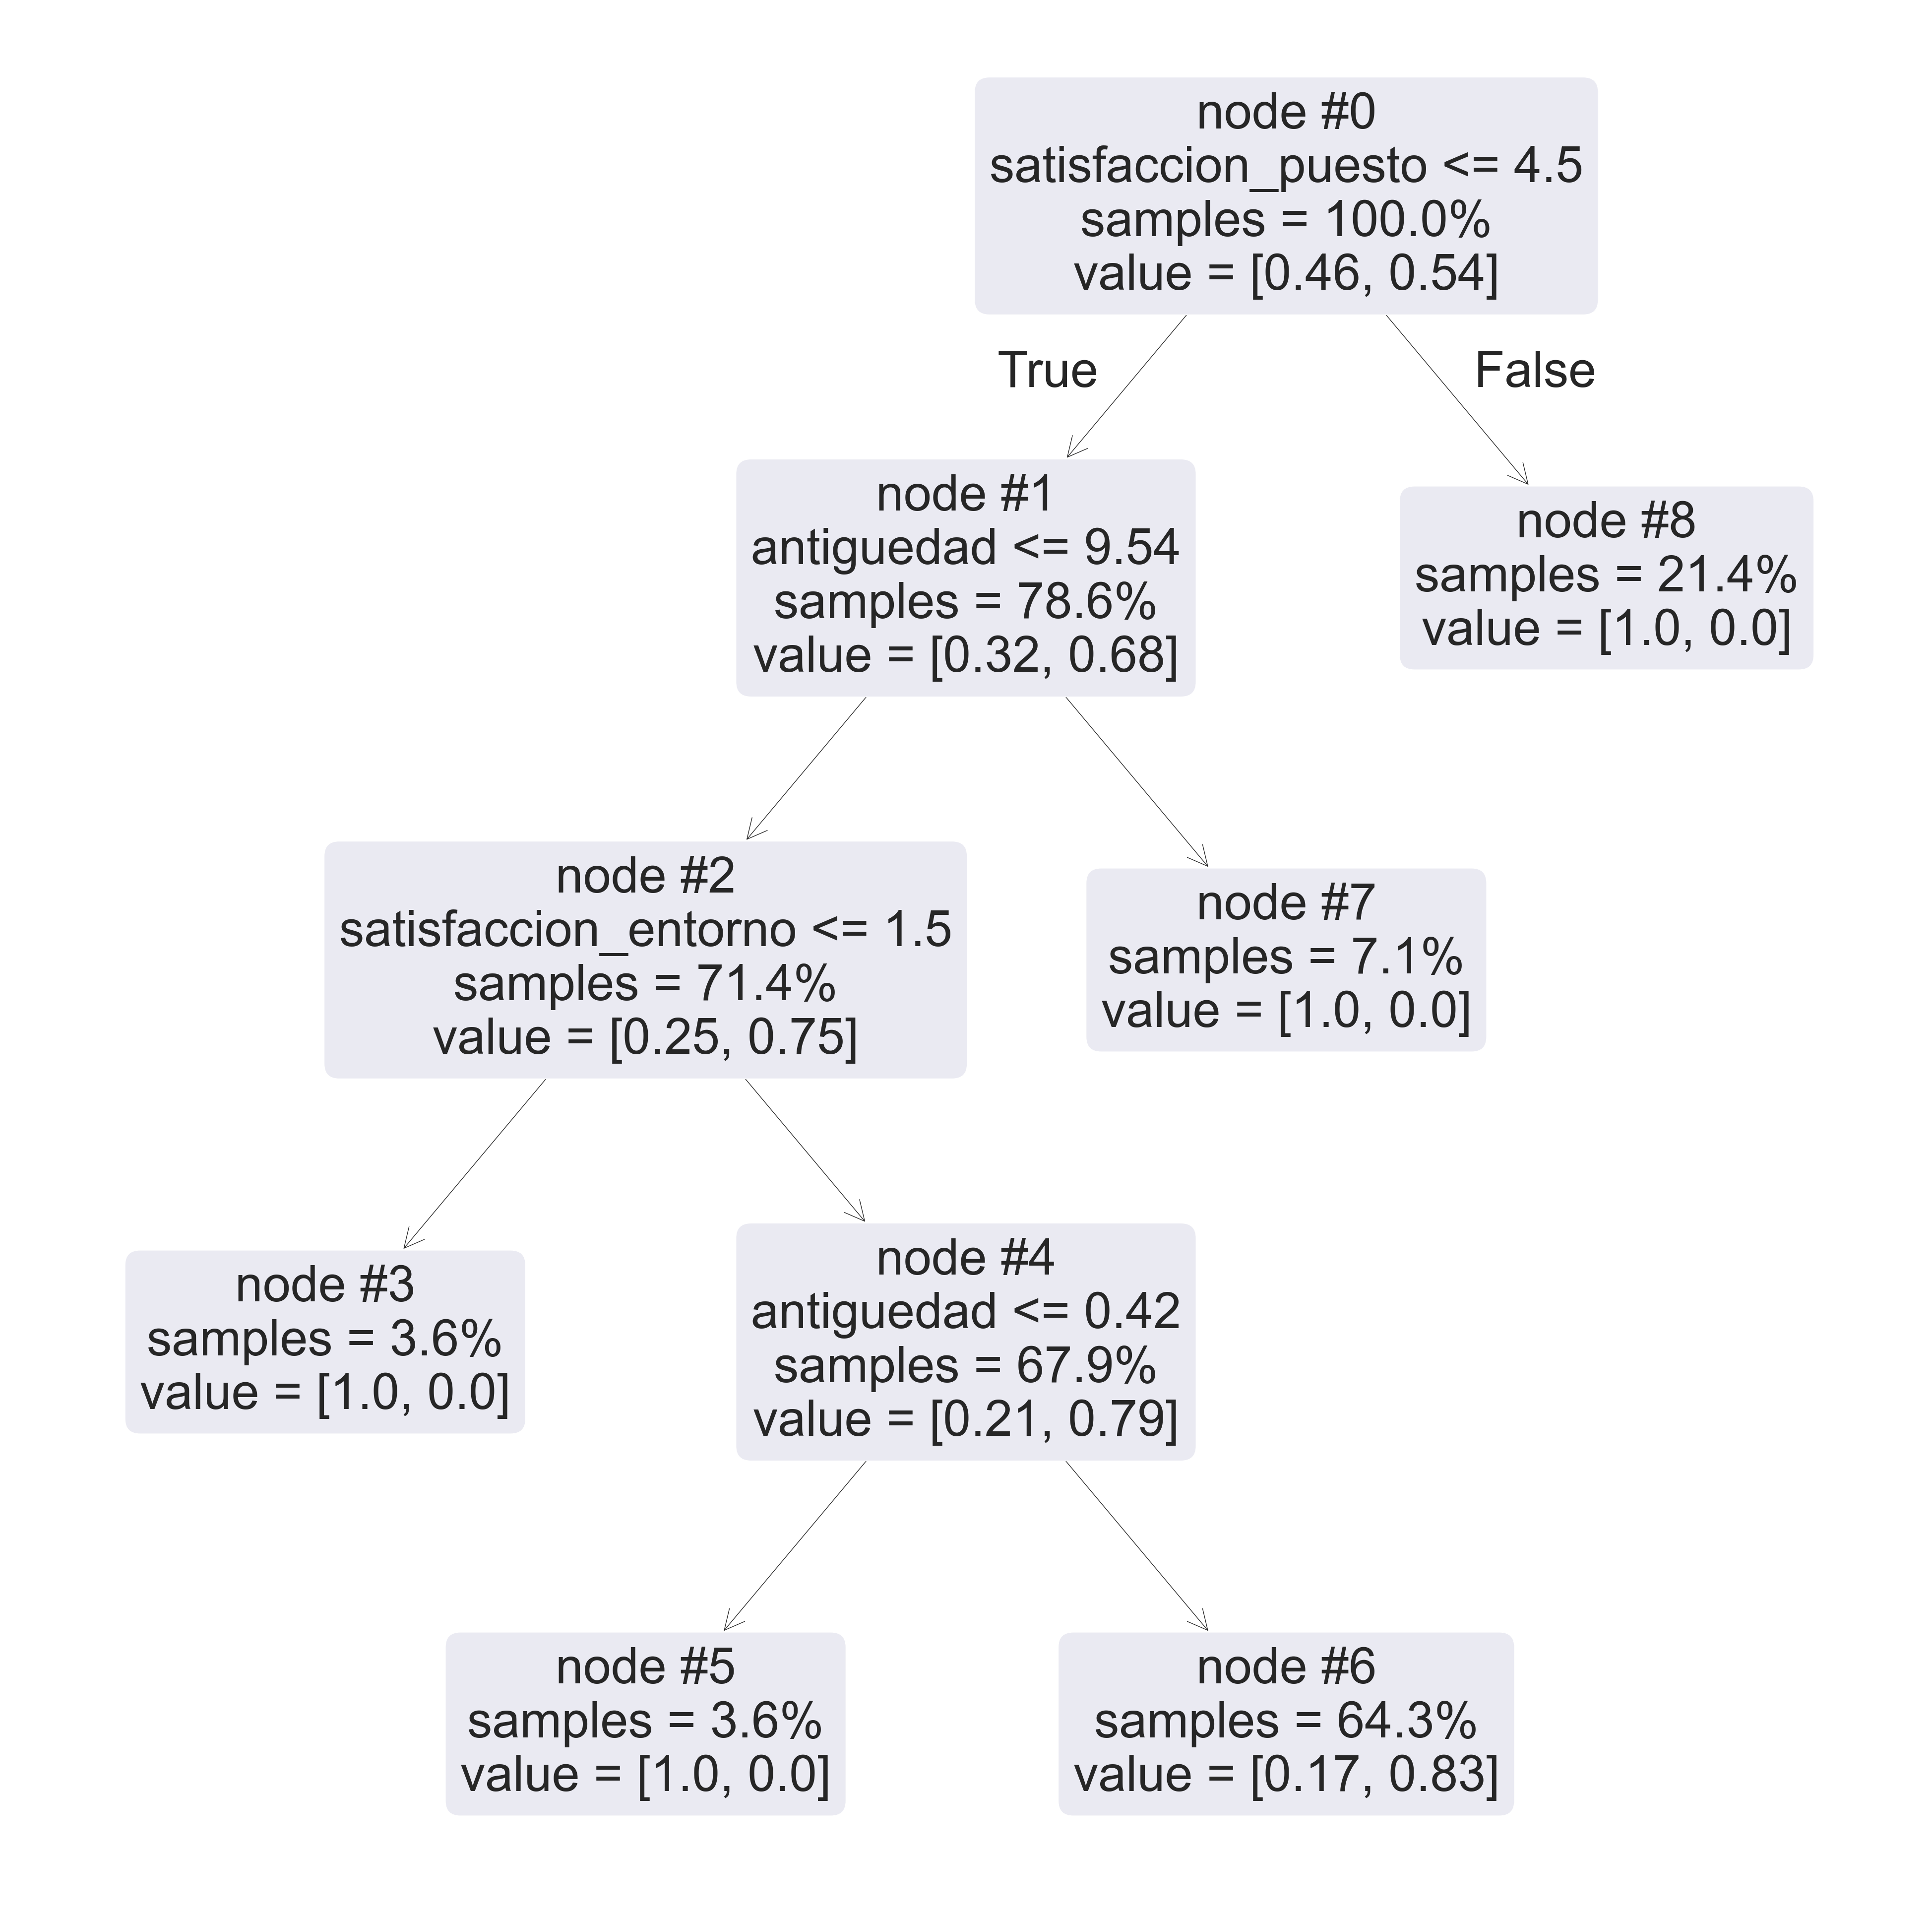

In [233]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);